# Title

## Intro

Intro text....

The first step is to get an overview of the data by listing out the column headers and displaying the data using QGrid.

In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [35]:
# import data
import pandas as pd
star_wars = pd.read_csv('./star_wars.csv', encoding='ISO-8859-1')

# list out the columns in the dataframe
for col in star_wars.columns:
    print(col)

RespondentID
Have you seen any of the 6 films in the Star Wars franchise?
Do you consider yourself to be a fan of the Star Wars film franchise?
Which of the following Star Wars films have you seen? Please select all that apply.
Unnamed: 4
Unnamed: 5
Unnamed: 6
Unnamed: 7
Unnamed: 8
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
Unnamed: 10
Unnamed: 11
Unnamed: 12
Unnamed: 13
Unnamed: 14
Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
Unnamed: 16
Unnamed: 17
Unnamed: 18
Unnamed: 19
Unnamed: 20
Unnamed: 21
Unnamed: 22
Unnamed: 23
Unnamed: 24
Unnamed: 25
Unnamed: 26
Unnamed: 27
Unnamed: 28
Which character shot first?
Are you familiar with the Expanded Universe?
Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦
Do you consider yourself to be a fan of the Star Trek franchise?
Gender
Age
Household Income
Education
Locat

In [36]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## RespondentID NaNs

In [37]:
# determine number of RespondentID entries that are NaN
print(star_wars['RespondentID'].isna().sum())

1


There is only one row where `RespondentID` is `NaN`. This row contains column title information for some of the survey questions, such as "Which of the following Star Wars films have you seen?". Ahead of removing this row from the main DataFrame, the information will be placed into a separate DataFrame for reference.

In [38]:
# create and display ref dataframe
survey_questions = pd.DataFrame({'col1' : star_wars.columns, 'col2' : star_wars.iloc[0,:].to_list()})
survey_questions

,col1,col2
0,RespondentID,NaN
1,Have you seen any of the 6 films in the Star W...,Response
2,Do you consider yourself to be a fan of the St...,Response
3,Which of the following Star Wars films have yo...,Star Wars: Episode I The Phantom Menace
4,Unnamed: 4,Star Wars: Episode II Attack of the Clones
5,Unnamed: 5,Star Wars: Episode III Revenge of the Sith
6,Unnamed: 6,Star Wars: Episode IV A New Hope
7,Unnamed: 7,Star Wars: Episode V The Empire Strikes Back
8,Unnamed: 8,Star Wars: Episode VI Return of the Jedi
9,Please rank the Star Wars films in order of pr...,Star Wars: Episode I The Phantom Menace


In [39]:
# remove superfluous row
star_wars = star_wars[star_wars['RespondentID'].notnull()].copy()

## Boolean Survey Questions

The next step is to convert Yes/No answers for the first two survey questions into booleans for future processing.

In [40]:
yes_no = { 'Yes' : True, 'No' : False}
survey_q1 = 'Have you seen any of the 6 films in the Star Wars franchise?'
survey_q2 = 'Do you consider yourself to be a fan of the Star Wars film franchise?'

# check entries for yes/no survey questions
print('Survey question: ', survey_q1, ':\n', star_wars[survey_q1].value_counts(dropna=False))
print('\nSurvey question: ', survey_q2, ':\n', star_wars[survey_q2].value_counts(dropna=False))

# convert yes/no survey questions to boolean
star_wars[survey_q1] = star_wars[survey_q1].map(yes_no)
star_wars[survey_q2] = star_wars[survey_q2].map(yes_no)
print('\n-------\n\nSurvey question: ', survey_q1, ':\n', star_wars[survey_q1].value_counts(dropna=False))
print('\nSurvey question: ', survey_q2, ':\n', star_wars[survey_q2].value_counts(dropna=False))

Survey question:  Have you seen any of the 6 films in the Star Wars franchise? :
 Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

Survey question:  Do you consider yourself to be a fan of the Star Wars film franchise? :
 Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

-------
Survey question:  Have you seen any of the 6 films in the Star Wars franchise? :
 True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

Survey question:  Do you consider yourself to be a fan of the Star Wars film franchise? :
 True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [41]:
# view updated dataframe
star_wars.head()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

## Checkbox Answers

The next step is to clean up the columns representing checkbox answers, starting with those inidcating whether a respondent has seen the individual Star Wars films. The column names will also be simplified.

In [42]:
# rename column names to 'seen_1', 'seen_2', etc. and clean columns
col_map = {}
for i in range(6):
    col = star_wars.columns[3:9][i]    # extract col name
#     print(star_wars[col].value_counts(dropna=False))
    col_map[col] = 'seen_{}'.format(i+1)    # create new col name in map
    star_wars[col] = star_wars[col].notnull()    # clean to boolean
#     print(star_wars[col].value_counts(dropna=False))
star_wars = star_wars.rename(columns=col_map)    # rename col names with map

# view updated dataframe
star_wars.head()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

Now the film rankings will be cleaned into numeric columns and simplified column names.

In [43]:
# rename column names to 'ranking_1', 'ranking_2', etc.
# and convert column to numeric
col_map = {}
for i in range(6):
    col = star_wars.columns[9:15][i]
    col_map[col] = 'ranking_{}'.format(i+1)
    star_wars[col] = star_wars[col].astype(float)
star_wars = star_wars.rename(columns=col_map)

# view updated dataframe
star_wars.head()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

## Examining Mean Film Rankings

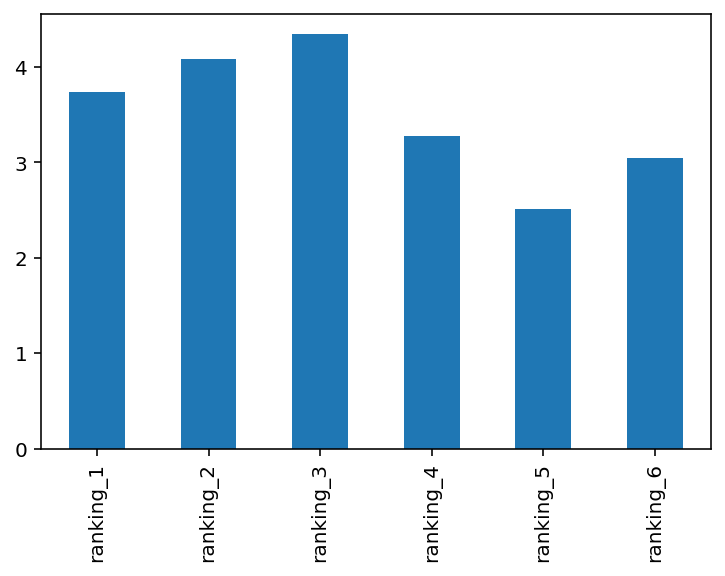

In [44]:
import matplotlib.pyplot as plt

mean_rankings = star_wars[star_wars.columns[9:15]].mean(axis=0)
mean_rankings.plot(kind='bar')
plt.show()

Episode V is on average the highest ranked (lowest number) of the films. This makes sense because the film is known for its iconic plot twist scene between Luke Skywalker and Darth Vader.

## Examining Films Seen by Respondents

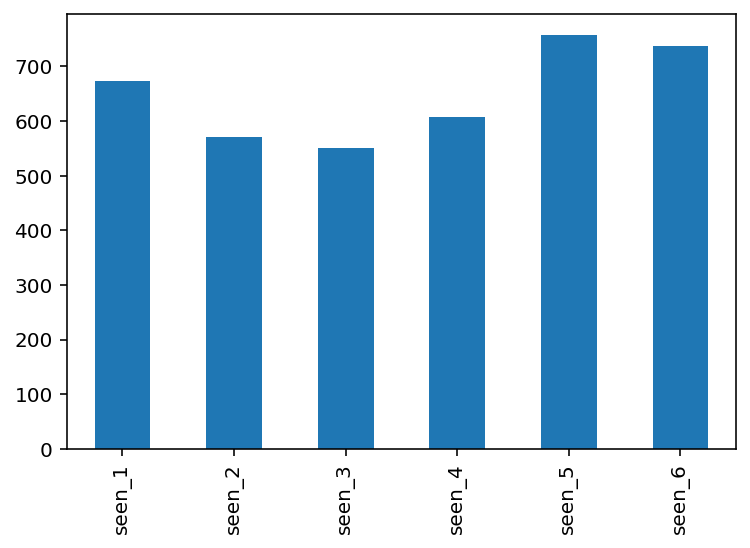

In [45]:
films_seen = star_wars[star_wars.columns[3:9]].sum(axis=0)
films_seen.plot(kind='bar')
plt.show()

The very first film (Episode IV) was a surprise box office hit, so it would be natural for the subsequent films (Episodes V and VI) to be popular. With the success of the first trilogy of films, there would have been significant hype for Episode I when it was released in cinemas. With Episode I not being as much of a success, the drop in viewings for Episodes II and III is understandable. Interestingly, the number of views in this survey sample is rather reflective of the rankings.

## Gender Differences

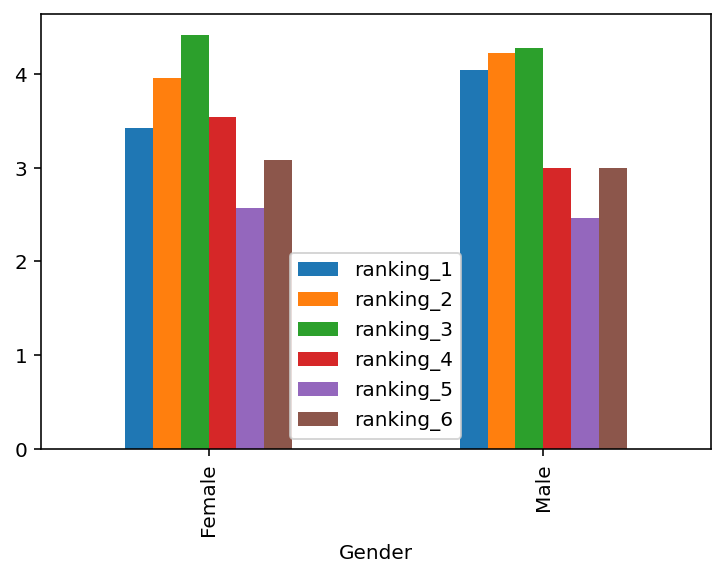

In [46]:
import numpy as np

# create gender grouping of dataframe
cols = star_wars.columns[:15].tolist()
cols.append('Gender')
gender_grouping = star_wars[cols].copy().groupby('Gender')

# plot average ranking
rank_cols = star_wars.columns[9:15].tolist()
gender_grouping.agg(np.mean)[rank_cols].plot(kind='bar')
plt.show()

Average rankings for the films are similar between genders in that Episode V is the highest ranked (lowest number) on average, with Episodes II and III being ranked the lowest (highest number). There is a greater spread in rankings for the prequel trilogy among women, who also on average rank Episode I about the same as Episode IV.

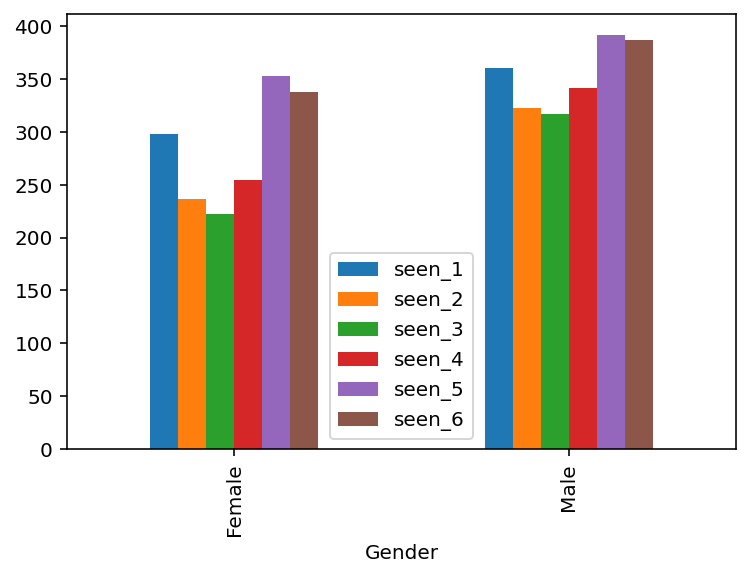

In [47]:
# plot film views
seen_cols = star_wars.columns[3:9].tolist()
gender_grouping.agg(np.sum)[seen_cols].plot(kind='bar')
plt.show()

In general, men have seen more Star Wars films than women, but the relative spread between views is similar, if more pronounced among women.